<a href="https://colab.research.google.com/github/thomascourtney/stock_prediction/blob/main/stock_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install matplotlib==3.1.1
!pip install pandas
!pip install numpy
!pip install scikit-learn

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('bmh')
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [53]:
from google.colab import files
uploaded = files.upload()

Saving AAPL (2).csv to AAPL (2).csv


In [55]:
d = pd.read_csv("AAPL (2).csv")
d

,Date,Close
0,2017-02-07,32.882500
1,2017-02-08,33.009998
2,2017-02-09,33.105000
3,2017-02-10,33.029999
4,2017-02-13,33.322498
...,...,...
1228,2021-12-22,175.639999
1229,2021-12-23,176.279999
1230,2021-12-27,180.330002
1231,2021-12-28,179.289993


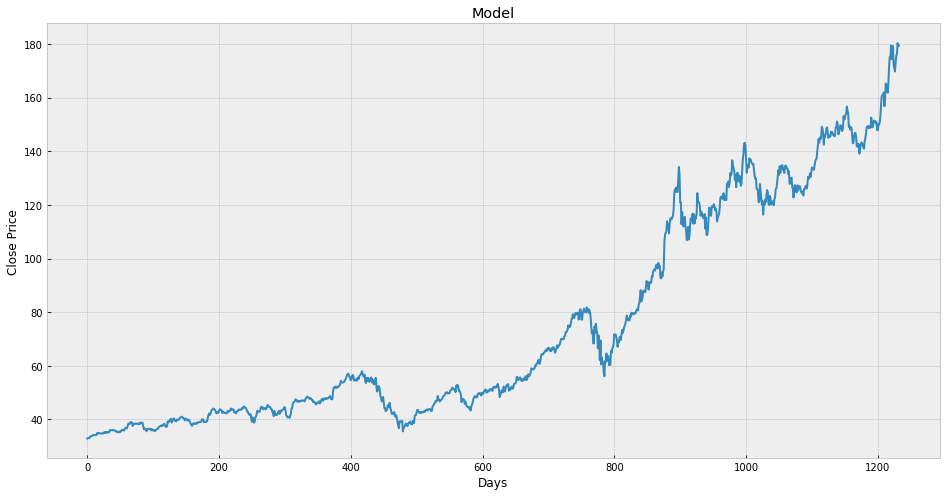

In [56]:
plt.figure(figsize=(16,8))
plt.title("Model")
plt.xlabel("Days")
plt.ylabel("Close Price")
plt.plot(d["Close"])
plt.show()

In [ ]:
d.shape

(252, 2)

In [58]:
d.dtypes

Date      object
Close    float64
dtype: object

In [59]:
d.describe()

,Close
count,1233.000000
mean,75.425511
std,40.404311
min,32.882500
25%,43.257500
50%,54.485001
75%,116.320000
max,180.330002


In [60]:
d = d[["Close"]]
d.head()

,Close
0,32.882500
1,33.009998
2,33.105000
3,33.029999
4,33.322498


In [85]:
prediction_days = 35
d["Prediction"] = d[["Close"]].shift(-prediction_days)
d.tail()

,Close,Prediction
1228,175.639999,NaN
1229,176.279999,NaN
1230,180.330002,NaN
1231,179.289993,NaN
1232,179.380005,NaN


In [86]:
X = np.array(d.drop(["Prediction"], 1))[:-prediction_days]
print(X)

[[ 32.8825  ]
 [ 33.009998]
 [ 33.105   ]
 ...
 [150.960007]
 [151.279999]
 [150.440002]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [87]:
Y = np.array(d["Prediction"])[:-prediction_days]
print(Y)

[ 36.029999  35.982498  35.915001 ... 180.330002 179.289993 179.380005]


In [88]:
x_tr, x_te, y_tr, y_te = train_test_split(X, Y, test_size = 0.25)

In [89]:
linear = LinearRegression().fit(x_tr, y_tr)

In [90]:
x_fut = d.drop(["Prediction"], 1)[:-prediction_days]
x_fut = x_fut.tail(prediction_days)
x_fut = np.array(x_fut)
x_fut

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


array([[143.429993],
       [145.850006],
       [146.830002],
       [146.919998],
       [145.369995],
       [141.910004],
       [142.830002],
       [141.5     ],
       [142.649994],
       [139.139999],
       [141.110001],
       [142.      ],
       [143.289993],
       [142.899994],
       [142.809998],
       [141.509995],
       [140.910004],
       [143.759995],
       [144.839996],
       [146.550003],
       [148.759995],
       [149.259995],
       [149.479996],
       [148.690002],
       [148.639999],
       [149.320007],
       [148.850006],
       [152.570007],
       [149.800003],
       [148.960007],
       [150.020004],
       [151.490005],
       [150.960007],
       [151.279999],
       [150.440002]])

In [91]:
linear_pred = linear.predict(x_fut)
print(linear_pred)

[150.61326402 153.14875859 154.17551941 154.26980996 152.64584175
 149.02074205 149.98464181 148.59117291 149.79604393 146.11855407
 148.18256339 149.11503261 150.4665833  150.05797378 149.96368323
 148.60164486 147.97302265 150.95901351 152.09055152 153.88215902
 156.19761052 156.72147022 156.95196954 156.1242775  156.07188838
 156.78434596 156.29191679 160.18943401 157.28724708 156.40716697
 157.51774639 159.05789496 158.50260577 158.8378676  157.95778645]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


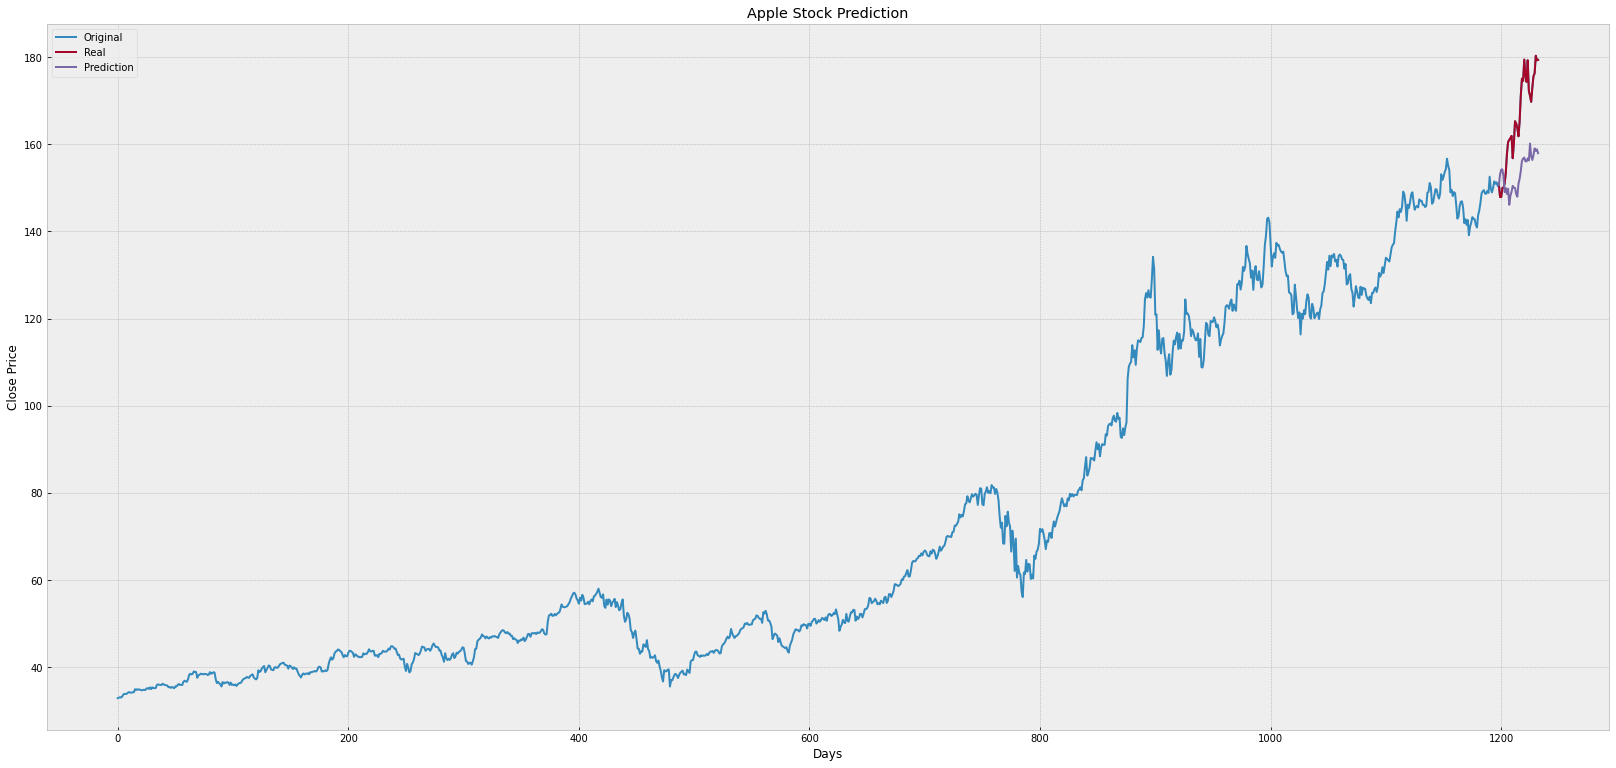

In [94]:
predictions = linear_pred

valid = d[X.shape[0]:]
valid["Prediction"] = predictions
plt.figure(figsize=(28,13))
plt.title("Apple Stock Prediction")
plt.xlabel("Days")
plt.ylabel("Close Price")
plt.plot(d["Close"])
plt.plot(valid[["Close", "Prediction"]])
plt.legend(["Original", "Real", "Prediction"])
plt.show()
